In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 15.2 MB/s 
     |████████████████████████████████| 77 kB 6.3 MB/s 
     |████████████████████████████████| 880 kB 46.1 MB/s 
     |████████████████████████████████| 6.6 MB 42.4 MB/s 
     |████████████████████████████████| 596 kB 53.6 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=50f1f8d845af9c25fbe450128cb1f54b01115bd6e7f7a986c1cde5ba4b547a53
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch

In [ ]:
from transformers import BertForQuestionAnswering

model=BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer

tokenizer=BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
question = "How many parameters does BERT-large have?"
answer_text = "BERT-large is really big... it has 24-layers and an embedding size of 1,024, for a total of 340M parameters! Altogether it is 1.34GB, so expect it to take a couple minutes to download to your Colab instance."


In [ ]:
input_ids=tokenizer.encode(question,answer_text)

In [ ]:
print(input_ids)

[101, 2129, 2116, 11709, 2515, 14324, 1011, 2312, 2031, 1029, 102, 14324, 1011, 2312, 2003, 2428, 2502, 1012, 1012, 1012, 2009, 2038, 2484, 1011, 9014, 1998, 2019, 7861, 8270, 4667, 2946, 1997, 1015, 1010, 6185, 2549, 1010, 2005, 1037, 2561, 1997, 16029, 2213, 11709, 999, 10462, 2009, 2003, 1015, 1012, 4090, 18259, 1010, 2061, 5987, 2009, 2000, 2202, 1037, 3232, 2781, 2000, 8816, 2000, 2115, 15270, 2497, 6013, 1012, 102]


In [ ]:
token_to_ids=tokenizer.convert_ids_to_tokens(input_ids)

In [ ]:
for token,id in zip(token_to_ids,input_ids):
  print(token,id)

[CLS] 101
how 2129
many 2116
parameters 11709
does 2515
bert 14324
- 1011
large 2312
have 2031
? 1029
[SEP] 102
bert 14324
- 1011
large 2312
is 2003
really 2428
big 2502
. 1012
. 1012
. 1012
it 2009
has 2038
24 2484
- 1011
layers 9014
and 1998
an 2019
em 7861
##bed 8270
##ding 4667
size 2946
of 1997
1 1015
, 1010
02 6185
##4 2549
, 1010
for 2005
a 1037
total 2561
of 1997
340 16029
##m 2213
parameters 11709
! 999
altogether 10462
it 2009
is 2003
1 1015
. 1012
34 4090
##gb 18259
, 1010
so 2061
expect 5987
it 2009
to 2000
take 2202
a 1037
couple 3232
minutes 2781
to 2000
download 8816
to 2000
your 2115
cola 15270
##b 2497
instance 6013
. 1012
[SEP] 102


In [ ]:
sep_index=input_ids.index(tokenizer.sep_token_id)
num_seg_a=sep_index+1
print(num_seg_a)
num_seg_b=len(input_ids)-num_seg_a
print(num_seg_b)
segment_ids=[0]*num_seg_a+[1]*num_seg_b
print(segment_ids)

11
59
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
outputs=model(torch.tensor([input_ids]),
              token_type_ids=torch.tensor([segment_ids]),
              return_dict=True)

In [ ]:
start_probs=outputs.start_logits
end_probs=outputs.end_logits

In [ ]:
print(start_probs)

tensor([[-6.4849, -6.4358, -8.1077, -8.8489, -7.8751, -8.0522, -8.4684, -8.5295,
         -7.7074, -9.2464, -6.4849, -2.7303, -6.3473, -5.7299, -7.7780, -7.0391,
         -6.3331, -7.3153, -7.3048, -7.4121, -2.2534, -5.3971, -0.9424, -7.3584,
         -5.4575, -7.0769, -4.4887, -3.9272, -5.6967, -5.9506, -5.0059, -5.9812,
          0.0530, -5.5968, -4.7093, -4.5750, -6.1786, -2.2294, -0.1904, -0.2327,
         -2.7331,  6.4256, -2.6543, -4.5655, -4.9872, -4.9834, -5.9110, -7.8402,
         -1.8986, -7.2123, -4.1543, -6.2354, -8.0953, -7.2329, -6.4411, -6.8384,
         -8.1032, -7.0570, -7.7332, -6.8711, -7.1045, -8.2966, -6.1939, -8.0817,
         -7.5501, -5.9695, -8.1007, -6.8849, -8.2273, -6.4850]],
       grad_fn=<CloneBackward0>)


In [ ]:
start_index=torch.argmax(start_probs)
end_index=torch.argmax(end_probs)
print(start_index)

tensor(41)


In [ ]:
answer=' '.join(token_to_ids[start_index:end_index+1])

In [ ]:
print(answer)

340 ##m


In [ ]:
answer=token_to_ids[start_index]
for i  in range(start_index+1,end_index+1):
  if token_to_ids[i][0:2]=='##':
    answer+=token_to_ids[i][2:]
  else:
    answer+=' '+token_to_ids[i]
print(answer)

340m


In [ ]:
labels=[]
for (ids,token) in enumerate(token_to_ids):
   labels.append('{:} - {:>2}'.format(token, ids))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

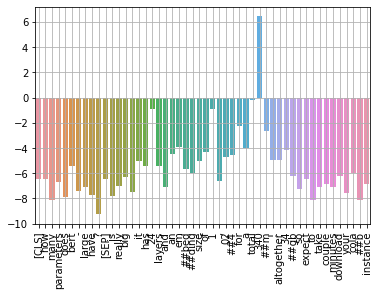

In [ ]:
s=start_probs.detach().numpy().flatten()
ax=sns.barplot(x=token_to_ids,y=s,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)